# Métodos numéricos para solución de ecuaciones diferenciales
Notebook de Jean Carlo Trejo Sánchez

### 1. Método de Euler
El método más sencillo para la solución de ecuaciones diferencial es el llamado método de *Euler* el cual se basa en la aproximación por diferencias de la derivada, de modo que tiene un error global relativamente alto. Para exponer su deducción consideramos una ecuación diferencial de primer orden:

\begin{align*}
\frac{dx}{dt}=f(x,t)
\end{align*}

Y de acuerdo a la definición de derivada:


\begin{align*}
\frac{dx}{dt}=\lim_{h\rightarrow 0} \frac{x(t+h)-x(t)}{h}
\end{align*}

Entonces, para una $h$ lo suficientemente pequeña, podemos aproximar:


\begin{align*}
f(x,t) \approx \frac{x(t+h)-x(t)}{h}
\end{align*}

Y despejando x(t+h) se tiene finalmente el esquema del método de Euler [3]

\begin{align*}
x(t+h)=x(t)+f(x,t)h \tag{1.1}
\end{align*}

o bien:

\begin{align*}
x_{n+1}=x_n+hf(x_n,t_n) \tag{1.2}
\end{align*}

Donde $x_n=(t+nh)$ y $h$ es entonces un parámetro cuya elección dependerá de la tolerancia al error del problema particular que se ataque y se analizará más adelante.

Así, teniendo la información del valor inicial $x_0=x(t_0)$ es posible calcular los valores siguientes iterativamente, esto es obtener $x_1$ a partir de $x_0$, $x_2$ a partir de $x_1$, etc.

Ahora bien, dado que los problemas que nos interesa resolver (ecuaciones de movimiento) involucran una segunda derivada, es necesario escribir las ecuaciones difrenciales de segundo orden como un sistema de ecuaciones diferenciales de primer orden, es decir:


\begin{align*}
\frac{d^2x(t)}{dt^2} = f\left( x, \frac{dx}{dt},t\right)\tag{1.3}
\end{align*}

Y se puede escribir como:

\begin{align*}
\frac{dx}{dt} &= v(x,t)\\
\frac{dv}{dt} &= f(x,v,t ) \tag{1.4}
\end{align*}

Y el esquema del método de Euler para ecuaciones de segundo orde quedaría como sigue:

\begin{align*}
v_{n+1} &= v_n + hf(x_n,v_n) \\
x_{n+1} &= x_n + hv_n \tag{1.5}
\end{align*}

De modo que a partir de los valores $x_0=x(t_0)$ y $v_0=v(t_0)$ es posible calcular los valores $x_1$ y $v_1$, a partir de estos los de $x_2$ y $v_2$ y así iterativamente. 



## 1.1 Ejemplo: El péndulo físico
Como primer ejemplo aplicativo consideramos el análisis del péndulo:
Para describir la ecuación de movimiento consideramos la figura 1.1. Al descomponer el peso de la lenteja en sus componentes tangiencial y normal a la ptrayectoria, obtenemos que la fuerza de restitución correspondiente a la componente tangencial:

\begin{align*}
F = -mg\sin(\theta)
\end{align*}

Aplicando la segunda ley de Newton, tenemos:

\begin{align*}
-mg\sin(\theta)=ma_T
\end{align*}

Donde $a_T$ es la aceleración tangencia, entonces:

\begin{align*}
-mg\sin(\theta)=mla
\end{align*}

Con $a$ como la acelaración angular. Entonces la ecuación de movimiento queda como:

\begin{align*}
\frac{d^2\theta}{dt^2} = -\frac{g}{l}\sin(\theta) \tag{1.6}
\end{align*}

Esta ecuación puede simplificarse si se consideran ángulos iniciales pequeños, del orden de 5 grados, de modo que $\sin(\theta) \approx \theta$, y se tiene que:

\begin{align*}
\frac{d^2\theta}{dt^2}= - \frac{g}{l}\theta \tag{1.7}
\end{align*}

Esta ecuación tiene una solución analítica sencilla;

\begin{align*}
\theta = \theta_0\cos\left( t \sqrt{\frac{g}{l}}+\phi\right) \tag{1.8}
\end{align*}

Sin embargo, para oscilaciones mayores la solición es mucho más complicada, como se verá más adelante. Por el momento atacaremos el problema numéricamente.

Para la solución numérica de la ecuación (1.6), el esquema del método de Euler es:

\begin{align*}
v_{n+1} &= v_{n} - \frac{g}{l}\sin(\theta)h \\
\theta_{n+1} &=  \theta_n + h v_n \tag{1.9}
\end{align*}

Donde $h$ ahora es un incremento de tiempo que llamaremos $\Delta t$. Así es posible calcular las posiciones del péndulo en instantes $t=0, \Delta t, 2\Delta t,...,n\Delta t$ como cuadro de una película.

A continuación se muestra el código de un programa para calcular 1000 posiciones angulares del péndulo en un intervalo de 10 segundos. Es decir, la duración de la película des de 10 segundos y hay 0.01 segundos entre cada cuadro. El péndulo tiene una longitud $l$ de 0.5 m, parte del reposo ($v_0=0$) desde una posición inicial $\theta_0=\frac{\pi}{5}$

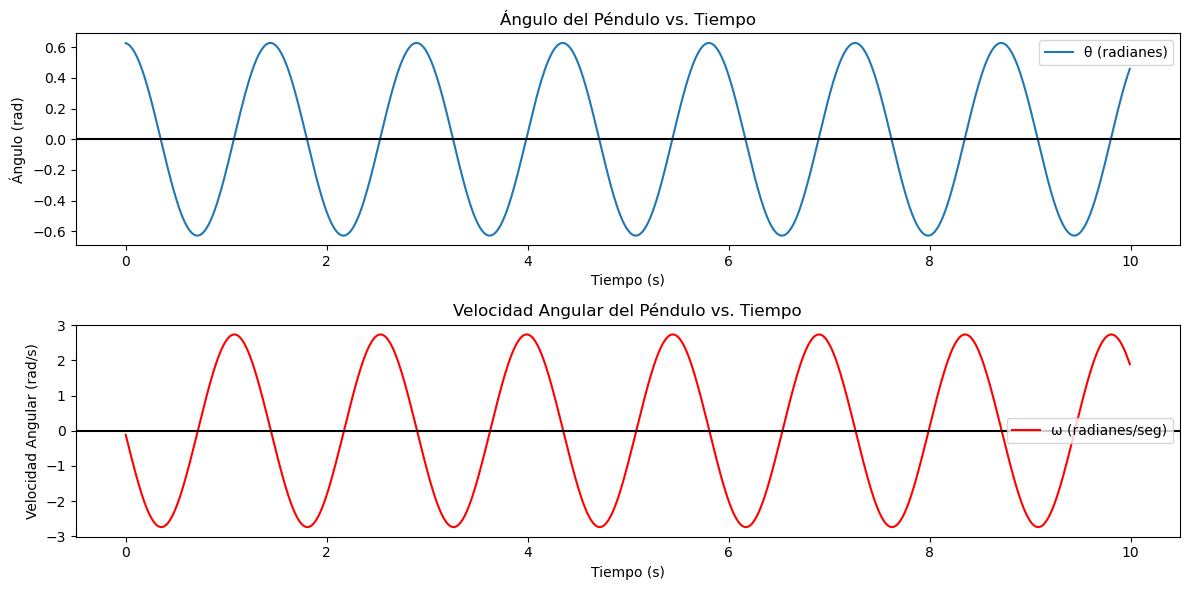

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Parámetros
h = 0.01  # [s]
g = 9.81  # [m/s^2]
l = 0.5   # [m]
x = np.pi/5  # [rad]
v = 0.0  # [m/s]

#Función que describe la aceleración angular
def f(x, v):
    return (-g/l * np.sin(x))

#Vector donde se almacenarán los resultados
X = np.zeros(1000)
V = np.zeros(1000)
T = np.zeros(1000)

#Simulación utilizando el método de Euler
for t in range(1000):
    v = v + f(x,v)*h
    x = x + v*h
    X[t]=(x)
    V[t]=(v)
    T[t]=(t*h)
    
#Graficar los resultados
plt.figure(figsize=(12, 6))

#Graficar θ (X) vs tiempo
plt.subplot(2, 1, 1)
plt.plot(T, X, label='θ (radianes)')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Ángulo del Péndulo vs. Tiempo')
plt.legend()

#Graficar ω (V) vs tiempo
plt.subplot(2, 1, 2)
plt.plot(T, V, label='ω (radianes/seg)', color='r')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular del Péndulo vs. Tiempo')
plt.legend()

plt.tight_layout()
plt.show()

Una representación últil para la evolución en el tiempo de un sistema dinámico como éste, es el llamado *diagrama de fase. Consiste en graficar la posición de la partícula contra su velocidad o momento, de modo que cada punto representa un estado del sistema (o valor de sus variables de estado). Para obtener esta representación, podemos modificar el código anterior como se sigue:

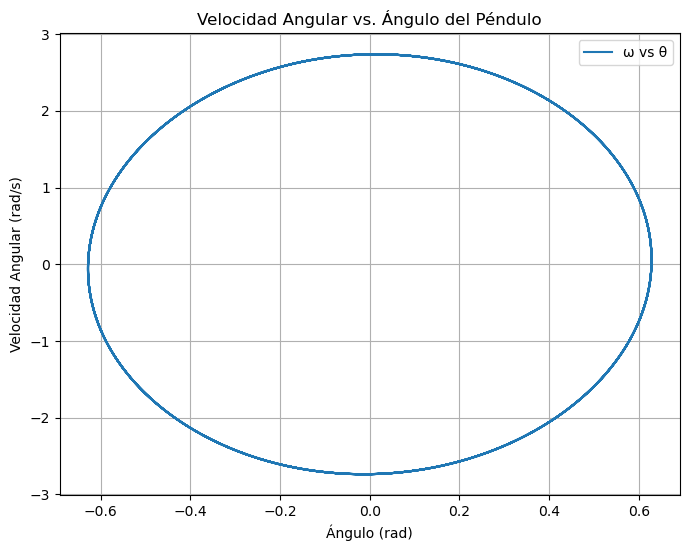

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
h = 0.01  # [s]
g = 9.81  # [m/s^2]
l = 0.5   # [m]
x = np.pi/5  # [rad]
v = 0.0  # [m/s]

# Función que describe la aceleración angular
def f(x, v):
    return -g/l * np.sin(x)

# Inicialización de arrays para almacenar resultados
X = np.zeros(t)
V = np.zeros(t)
T = np.zeros(t)

# Simulación utilizando el método de Euler
for t in range(t):
    v = v + f(x,v)*h
    x = x + v*h
    X[t] = x
    V[t] = v
    T[t] = t*h

# Graficar los resultados
plt.figure(figsize=(8,6))

# Graficar θ (X) vs ω (V)
plt.plot(X, V, label='ω vs θ')
plt.xlabel('Ángulo (rad)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular vs. Ángulo del Péndulo')
plt.legend()

plt.grid(True)
plt.show()


Del diagrama de fase mostrado en la gráfica anterior, podemos apreciar el comportamiento esperado de un pendulo que parte del reposo desde un ángulo inicial $\theta_0=\frac{\pi}{5}$. El estado inicial corresponde al punto donde la elipse corta al eje horizontal en la parte positiva. Si seguimos el trazo de la elipse podemos apreciar que la velocidad crece, teniendo su máximo al cortar el eje vertical, ára decrecer hasta llegar a la condicion inicial completando el periodo.

Podemos ahora añadir un término de fricción como una fuerza que se opone al movimiento y que es proporcional a una velocidad [16]:

\begin{align*}
F_f=-\beta \frac{d \theta}{dt} \tag{1.10}
\end{align*}

De modo que la ecuación (1.6) queda ahora como:

\begin{align*}
\frac{d^2\theta}{dt^2} = -\frac{f}{l}\sin(\theta) - \beta \frac{d \theta}{dt} \tag{1.11}
\end{align*}

Con lo que el esquema de Euler mostrado en la ecuación (1.9) se modifica como sigue:

\begin{align*}
v_{n+1} &= v_n - \left( \frac{g}{l}\sin(\theta) + \beta v_n  \right)h \\
\theta_{n+1}&= \theta_n h v_n \tag{1.12}
\end{align*}

La modificación del código en Python se deja como ejercicio al lector:


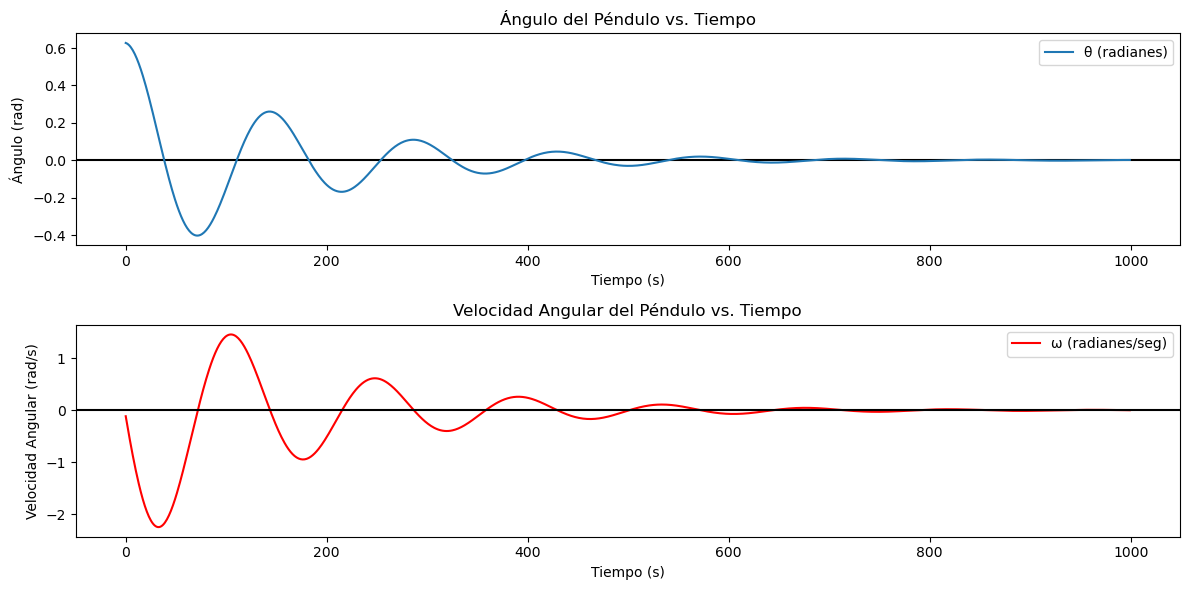

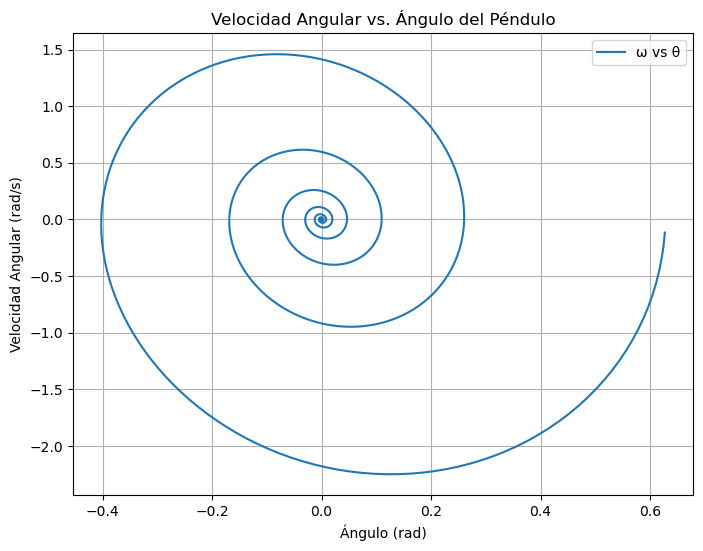

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Parámetros
h = 0.01  # [s]
g = 9.81  # [m/s^2]
l = 0.5   # [m]
beta = 1.2 #constante de fricción

#valores iniciales
x = np.pi/5  # [rad]
v = 0.0  # [m/s]

#Función que describe la aceleración angular
def f(x,v):
    return -g/l*np.sin(x) - beta*v

#Declaración de vectores donde se almacenarán los valores 
X = np.zeros(1000)
V = np.zeros(1000)
T = np.zeros(1000)

#Simulación cusando el método de Euler
for t in range(1000):
    v = v - (g/l*np.sin(x) + beta*v)*h
    x = x + h*v
    #Almacenando los valores de las variables a medida que se itera t
    X[t] = x
    V[t] = v
    T[t] = t+h
    
#Grafica de la función
plt.figure(figsize=(12,6))

#Grafica θ (X) vs tiempo
plt.subplot(2,1,1)
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.plot(T, X, label='θ (radianes)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Ángulo del Péndulo vs. Tiempo')
plt.legend()

#Grafica ω (V) vs tiempo
plt.subplot(2,1,2)
plt.plot(T, V, label='ω (radianes/seg)', color='r')
plt.xlabel('Tiempo (s)')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular del Péndulo vs. Tiempo')
plt.legend()

plt.tight_layout()
plt.show()

#Gráfica del diagrama de fase
plt.figure(figsize=(8, 6))

#Grafica θ (X) vs ω (V)
plt.plot(X, V, label='ω vs θ')
plt.xlabel('Ángulo (rad)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular vs. Ángulo del Péndulo')
plt.legend()

plt.grid(True)
plt.show()